In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
mouse_file = "raw_data/mouse_drug_data.csv"
trial_file = "raw_data/clinicaltrial_data.csv"

In [140]:
mouse_df = pd.read_csv(mouse_file)
trial_df = pd.read_csv(trial_file)

In [141]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [142]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [143]:
full_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [144]:
tumor_response_error = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tre_df = tumor_response_error.to_frame()
tre_df = tre_df.rename(columns= {"Tumor Volume (mm3)": "Standard Error"})
tre_df = tre_df.unstack(0)
tre_df.head()

Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10              0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15              0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20              0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182

In [145]:
full_df.groupby("Drug")["Timepoint"].count()
tumor_response = full_df.groupby(["Drug", "Timepoint"])
tumor_df = tumor_response["Tumor Volume (mm3)"].mean().to_frame()
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [146]:
tumor_plot_pre = tumor_df.unstack(0)
tumor_plot_df = tumor_plot_pre["Tumor Volume (mm3)"]
tumor_plot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [147]:
full_df.groupby("Drug")["Timepoint"].count()
meta_response = full_df.groupby(["Drug", "Timepoint"])
meta_df = meta_response["Metastatic Sites"].mean().to_frame()
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

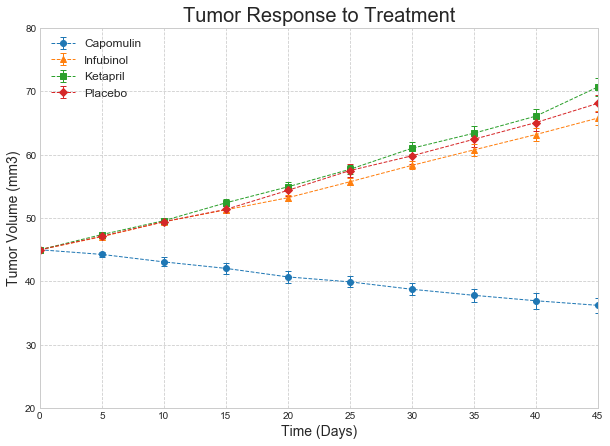

In [148]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = tre_df["Standard Error"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(20, 80)
plt.xlim(0, 45)

plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()


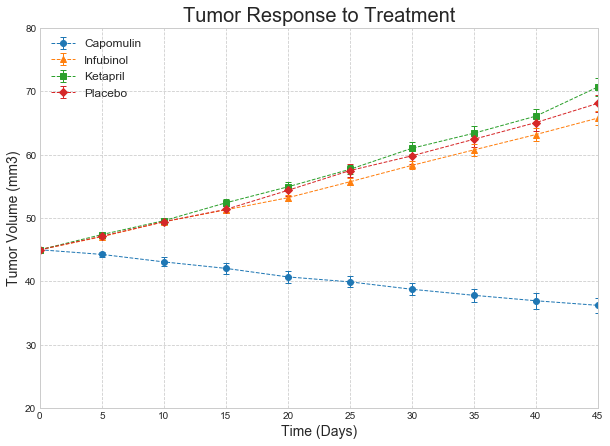

In [149]:
#This plot is with seaborn
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))

error = tre_df["Standard Error"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_plot_df["Capomulin"], yerr=error, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_plot_df["Infubinol"], yerr=error, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_plot_df["Ketapril"], yerr=error, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error = tre_df["Standard Error"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_plot_df["Placebo"], yerr=error, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(20, 80)
plt.xlim(0, 45)
plt.style.use('seaborn-whitegrid')
plt.title("Tumor Response to Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()


In [150]:
meta_response_error = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
mre_df = meta_response_error.to_frame()
mre_df = mre_df.rename(columns= {"Metastatic Sites": "Standard Error"})
mre_df = mre_df.unstack(0)
mre_df.head()

Standard Error                                                    \
Drug           Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                    
0               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5               0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10              0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15              0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20              0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378

In [151]:
meta_plot_pre = meta_df.unstack(0)
meta_plot_df = meta_plot_pre["Metastatic Sites"]
meta_plot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


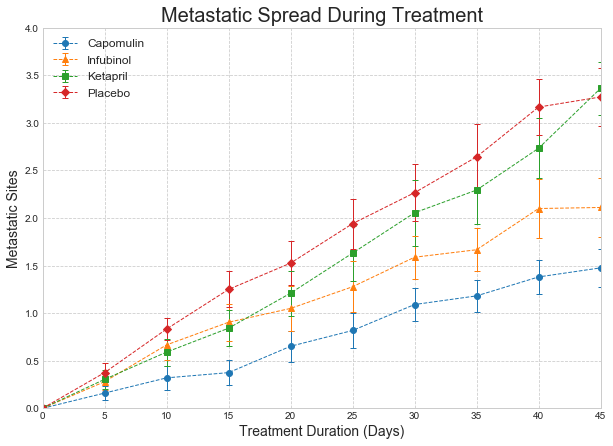

In [152]:
plt.figure(figsize=(10,7))

error2 = mre_df["Standard Error"]["Capomulin"]
cap2 = plt.errorbar(x_axis, meta_plot_df["Capomulin"], yerr=error2, fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = mre_df["Standard Error"]["Infubinol"]
infu2 = plt.errorbar(x_axis, meta_plot_df["Infubinol"], yerr=error2, fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = mre_df["Standard Error"]["Ketapril"]
keta2 = plt.errorbar(x_axis, meta_plot_df["Ketapril"], yerr=error2, fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)

error2 = mre_df["Standard Error"]["Placebo"]
plac2 = plt.errorbar(x_axis, meta_plot_df["Placebo"], yerr=error2, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=20)
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap2, infu2, keta2, plac2), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [153]:
pre_mice = full_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mice = pre_mice.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [154]:
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


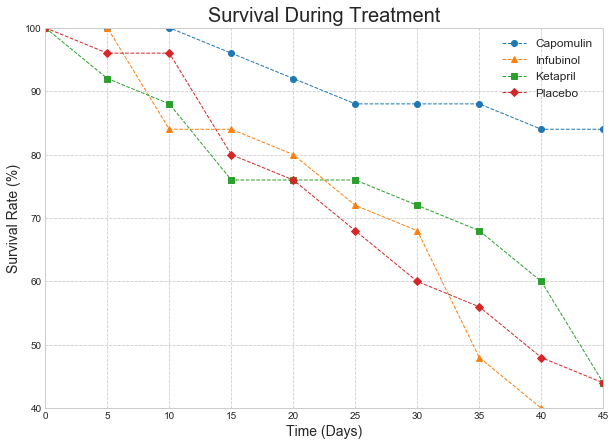

In [155]:
plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (mice_df["Capomulin"]/25*100), fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)
infu3 = plt.errorbar(x_axis, (mice_df["Infubinol"]/25*100), fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)
keta3 = plt.errorbar(x_axis, (mice_df["Ketapril"]/25*100),  fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)
plac3 = plt.errorbar(x_axis, (mice_df["Placebo"]/25*100),  fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=20)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Rate (%)", fontsize=14)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)
plt.show()

In [156]:
capchange = ((tumor_plot_df["Capomulin"][45] - tumor_plot_df["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_df["Ceftamin"][45] - tumor_plot_df["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_df["Infubinol"][45] - tumor_plot_df["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_df["Ketapril"][45] - tumor_plot_df["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_df["Naftisol"][45] - tumor_plot_df["Naftisol"][0])/45)*100
placchange = ((tumor_plot_df["Placebo"][45] - tumor_plot_df["Placebo"][0])/45)*100
propchange = ((tumor_plot_df["Propriva"][45] - tumor_plot_df["Propriva"][0])/45)*100
ramichange = ((tumor_plot_df["Ramicane"][45] - tumor_plot_df["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_df["Stelasyn"][45] - tumor_plot_df["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_df["Zoniferol"][45] - tumor_plot_df["Zoniferol"][0])/45)*100


In [157]:
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                               "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [158]:
plt.figure(figsize=(8,5))

rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_df["Drug"])
plt.xlim(0, 4)
plt.ylim(-30, 70)

(-30, 70)

In [159]:
plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change")

Text(0,0.5,'% Tumor Volume Change')

In [160]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

In [161]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

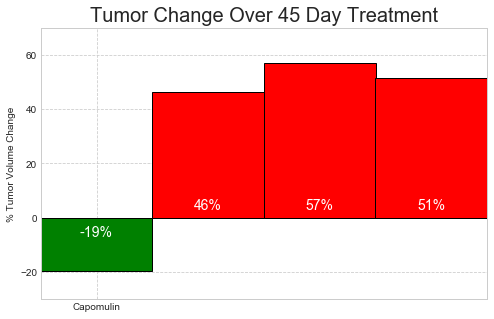

In [137]:

plt.show()